In [1]:
# Importer les bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
#from df_cleaned_data import get_df_cleaned_all_columns  

In [2]:
# Fonction pour charger les données brutes
def load_raw_data():
    # Lire les données JSON brutes, sans transformation
    with open('recovr-tickets-data.json') as f:
        json_data = json.load(f)

    # Transformer les données JSON en DataFrame
    df_raw = pd.json_normalize(json_data)

    return df_raw

# Charger les données brutes dans df_raw
df_raw = load_raw_data()

# Afficher les premières lignes pour vérifier le contenu
print(df_raw.head())

# Afficher la liste des colonnes pour voir toute la structure
print(df_raw.columns)

           type     id  created_at  updated_at  waiting_since  snoozed_until  \
0  conversation  56491  1726665673  1726665783            NaN            NaN   
1  conversation  55964  1726067375  1726662433            NaN   1.727104e+09   
2  conversation  56123  1726247395  1726662313            NaN            NaN   
3  conversation  56125  1726247839  1726661724            NaN            NaN   
4  conversation  56452  1726609852  1726661576            NaN            NaN   

   admin_assignee_id  team_assignee_id   open    state  ...  \
0          6409379.0         4560353.0   True     open  ...   
1          6647203.0         4560353.0   True  snoozed  ...   
2          6409379.0         4560353.0  False   closed  ...   
3          6409379.0         4560353.0  False   closed  ...   
4          6647203.0         4560353.0  False   closed  ...   

   custom_attributes.Customer Satisfaction Reason first_contact_reply  \
0                                             NaN                 N

In [8]:
df_raw

,type,id,created_at,updated_at,waiting_since,snoozed_until,admin_assignee_id,team_assignee_id,open,state,...,custom_attributes.Customer Satisfaction Reason,first_contact_reply,custom_attributes.Ticket category,custom_attributes.Created by,custom_attributes._default_title_,custom_attributes._default_description_,custom_attributes.Customer reports,custom_attributes.Theft Case end status,custom_attributes.Escalated Ticket,custom_attributes.External ID
0,conversation,56491,1726665673,1726665783,NaN,NaN,6409379.0,4560353.0,True,open,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,conversation,55964,1726067375,1726662433,NaN,1.727104e+09,6647203.0,4560353.0,True,snoozed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,conversation,56123,1726247395,1726662313,NaN,NaN,6409379.0,4560353.0,False,closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,conversation,56125,1726247839,1726661724,NaN,NaN,6409379.0,4560353.0,False,closed,...,Agent Service,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,conversation,56452,1726609852,1726661576,NaN,NaN,6647203.0,4560353.0,False,closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42295,conversation,189,1614264921,1618393703,1.614265e+09,NaN,4553984.0,NaN,False,closed,...,NaN,NaN,NaN,4553984.0,NaN,NaN,NaN,NaN,NaN,NaN
42296,conversation,380,1617812190,1618391786,NaN,NaN,4607929.0,4560349.0,False,closed,...,NaN,NaN,NaN,4553984.0,NaN,NaN,NaN,NaN,NaN,NaN
42297,conversation,376,1617790952,1618391780,NaN,NaN,4607929.0,4560349.0,False,closed,...,NaN,NaN,NaN,4553984.0,NaN,NaN,NaN,NaN,NaN,NaN
42298,conversation,321,1617188036,1618391688,NaN,NaN,4631197.0,4560349.0,False,closed,...,NaN,NaN,NaN,4553984.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_raw['created_at']

0        1726665673
1        1726067375
2        1726247395
3        1726247839
4        1726609852
            ...    
42295    1614264921
42296    1617812190
42297    1617790952
42298    1617188036
42299    1618339758
Name: created_at, Length: 42300, dtype: int64

In [6]:
# Afficher le type de chaque colonne et le nombre de valeurs non nulles
print("Informations générales sur le DataFrame :")
print(df_raw.info())

Informations générales sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42300 entries, 0 to 42299
Data columns (total 88 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   type                                             42300 non-null  object 
 1   id                                               42300 non-null  object 
 2   created_at                                       42300 non-null  int64  
 3   updated_at                                       42300 non-null  int64  
 4   waiting_since                                    518 non-null    float64
 5   snoozed_until                                    12 non-null     float64
 6   admin_assignee_id                                41515 non-null  float64
 7   team_assignee_id                                 38098 non-null  float64
 8   open                                             42300 non-null 

In [7]:
# Obtenir un aperçu statistique des colonnes numériques (si applicable)
print("\nRésumé statistique des colonnes numériques :")
print(df_raw.describe())


Résumé statistique des colonnes numériques :
         created_at    updated_at  waiting_since  snoozed_until  \
count  4.230000e+04  4.230000e+04   5.180000e+02   1.200000e+01   
mean   1.695478e+09  1.700635e+09   1.690498e+09   1.728256e+09   
std    2.266504e+07  1.927236e+07   3.503938e+07   8.298059e+05   
min    1.611056e+09  1.618340e+09   1.611742e+09   1.726672e+09   
25%    1.682443e+09  1.688044e+09   1.666768e+09   1.728140e+09   
50%    1.698775e+09  1.700356e+09   1.707379e+09   1.728486e+09   
75%    1.713489e+09  1.718126e+09   1.715531e+09   1.728637e+09   
max    1.726666e+09  1.726666e+09   1.726633e+09   1.729091e+09   

       admin_assignee_id  team_assignee_id  conversation_rating  \
count       4.151500e+04      3.809800e+04                  0.0   
mean        5.598387e+06      4.560352e+06                  NaN   
std         7.808836e+05      1.832944e+00                  NaN   
min         4.553984e+06      4.560349e+06                  NaN   
25%         4.9

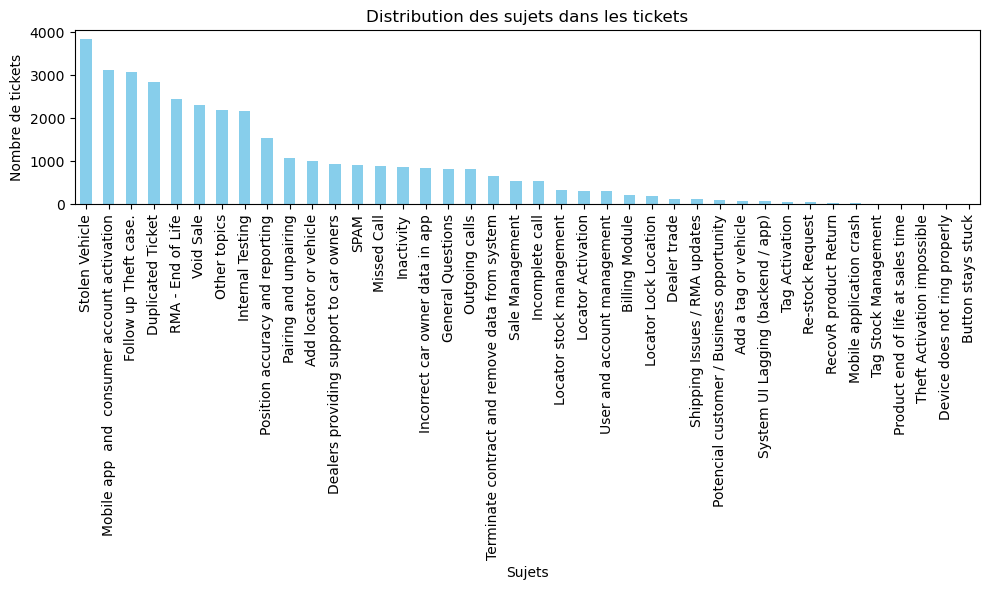

In [6]:
# 1. Distribution des sujets (topics)
plt.figure(figsize=(10, 6))
df_cleaned['topics'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution des sujets dans les tickets')
plt.xlabel('Sujets')
plt.ylabel('Nombre de tickets')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

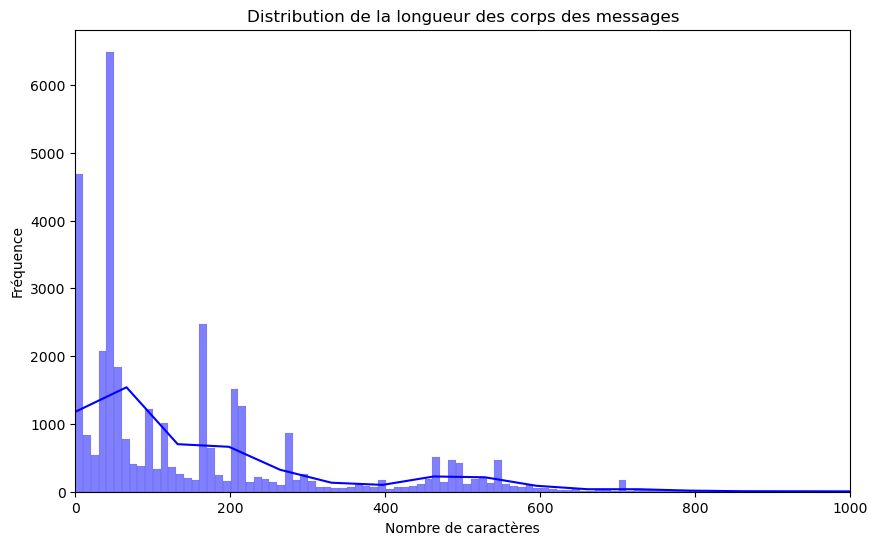

In [8]:
# ---------------------------------------------------
# Graphique 1: Histogramme de la longueur des messages
# ---------------------------------------------------
plt.figure(figsize=(10, 6))
# Utilisation de la longueur des messages directement dans le graphique sans ajout de colonnes
sns.histplot(df_cleaned['source'].apply(lambda x: len(str(x))), kde=True, color='blue')
plt.title('Distribution de la longueur des corps des messages')
plt.xlabel('Nombre de caractères')
plt.ylabel('Fréquence')

# Limiter l'axe x à une longueur maximale de 1000 caractères pour exclure les outliers
plt.xlim(0, 1000)  # Vous pouvez ajuster cette limite selon vos besoins
plt.show()

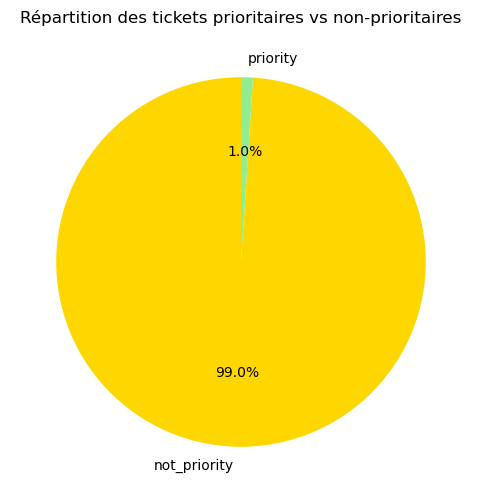

In [9]:
# 3. Répartition des tickets selon 'priority' (prioritaire / non-prioritaire)
plt.figure(figsize=(6, 6))
df_cleaned['priority'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'lightgreen'], startangle=90)
plt.title('Répartition des tickets prioritaires vs non-prioritaires')
plt.ylabel('')
plt.show()

In [10]:
# Vérifier la structure de la colonne 'topics'
print(df_cleaned['topics'].head())  # Cela permet de voir si 'topics' est une liste ou une chaîne


0                   Re-stock Request
1      Shipping Issues / RMA updates
2    Incorrect car owner data in app
3                  RMA - End of Life
4                       Other topics
Name: topics, dtype: object


0    1
1    1
2    1
3    1
4    1
Name: topics, dtype: int64


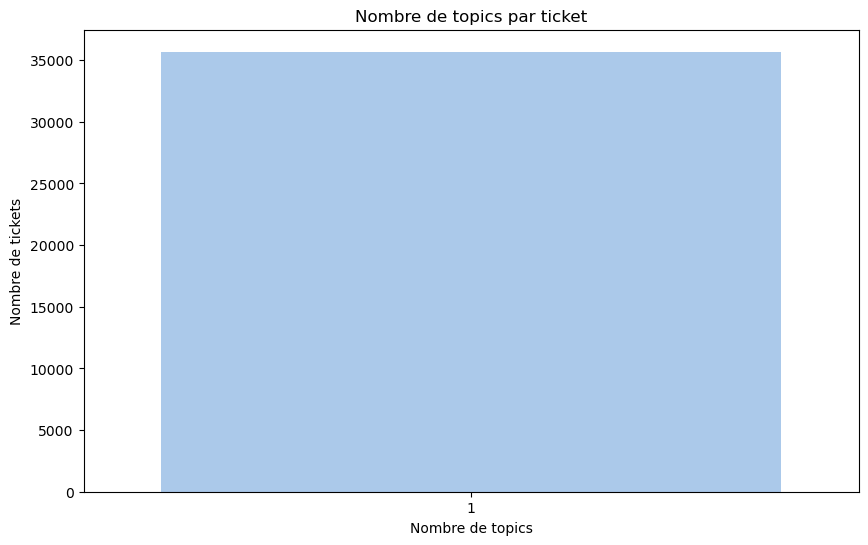

In [11]:
# Calculer le nombre de topics par ticket sans ajouter de colonne
# Nous partons du principe que les topics sont séparés par des virgules dans les chaînes de caractères

num_topics = df_cleaned['topics'].apply(lambda x: len(x.split(',')))

# Afficher un aperçu des résultats
print(num_topics.head())

# ---------------------------------------------------
# Graphique: Distribution du nombre de topics par ticket (sans ajout de colonne)
# ---------------------------------------------------
plt.figure(figsize=(10, 6))
sns.countplot(x=num_topics, palette='pastel')
plt.title('Nombre de topics par ticket')
plt.xlabel('Nombre de topics')
plt.ylabel('Nombre de tickets')
plt.show()